# Introduction

In this project, we will work with a **fuel quality data** containing thousands of rows. The dataset is provided by the United States Energy Information Administration and contains information on the fuel type, fuel quantity, power plant producing the fuel and various fuel costs.

The aim of this project is to:

- Explore operating costs of power plants. 

- See how fuel costs impact the viability of generation sources. 

- Highlight the competitiveness of renewable electricity. 

- Show how generation mix of different utilities evolved over time.

The *data dictionary* provided with the data is as follows:


- <span style='color:green'>**record_id**</span> \- record id 


- <span style='color:green'>**utility_id_ferc1**</span> \- Utility id assigned by the FERC


- <span style='color:green'>**report_year**</span> \- year of report


- <span style='color:green'>**plant_name_ferc1**</span> \- the name of the plant


- <span style='color:green'>**fuel_type_code_pudl**</span> \- the type of fuel


- <span style='color:green'>**fuel_unit**</span> \- the unit of fuel


- <span style='color:green'>**fuel_qty_burned**</span> \- the quantity of fuel burned


- <span style='color:green'>**fuel_mmbtu_per_unit**</span> \- the measure of energy per unit


- <span style='color:green'>**fuel_cost_per_unit_burned**</span> \- the fuel cost per unit burned


- <span style='color:green'>**fuel_cost_per_unit_delivered**</span> \- the cost of fuel delivered per unit 


- <span style='color:green'>**fuel_cost_per_mmbtu**</span> \- the cost of fuel per mmbtu



## Reading in the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url_path = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv' 
data = pd.read_csv(url_path)
data.to_csv('/storage/emulated/0/Hamoye/Stage A/util.csv', index=False)

In [2]:
utilities = pd.read_csv('/storage/emulated/0/Hamoye/Stage A/utility.csv')


In [3]:
utilities.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


Now let's use the `DataFrame.info()` method to display information about the `utilities` dataframe

In [4]:
utilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


From the previous cell, we can see that the columns are represented by various data types: 

- *`int64`*

- *`object`*

- *`float64`*

It appears that the data type for each column is consistent with the nature of values they contain. That is, the columns containing numeric objects are either `int64` or `float64`, and those containing values stored as strings are stored as `object` data type.

Also, there are **29,523** entries in the data, and all the columns are consistent with that figure except the `fuel_unit` column. This indicates that it has some *null* values in it.

Let's handle the missing data.

## Cleaning the Data

The `fuel_unit` column which has some missing data has an *object* data type, this means we can't just fill with any conventional imputing method as the values aren't numerical ones. 

We are left with either of the two options:

- drop the rows that has null values present in them

- see if an inference can be made by looking at the properties of other entries to plausibly determine what the missing values should be.

Since there are only **180** missing values in the `fuel_unit` column, dropping the rows with these null values may seem the way to go, as they account for just about **0.6%** of the total entries. But first, let's see if we can infer from the dataset the missing values.

Let's take a look at these rows containing null values.

In [5]:
null_fuel_unit = utilities[utilities['fuel_unit'].isnull()]

In [6]:
null_fuel_unit.head(10)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.77,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.00,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.00,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.00,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.00,0.480
829,f1_fuel_1994_12_189_0_1,189,1994,lake pauline,gas,NaN,41121.0,1.006000,2.400,2.40,2.380
830,f1_fuel_1994_12_189_0_4,189,1994,fort phantom,gas,NaN,17436721.0,1.004051,2.420,2.42,2.410
832,f1_fuel_1994_12_189_0_7,189,1994,rio pecos,gas,NaN,8488412.0,0.950000,1.720,1.72,1.810
834,f1_fuel_1994_12_189_0_13,189,1994,paint creek,gas,NaN,3636694.0,0.993000,2.050,2.05,2.070
835,f1_fuel_1994_12_189_1_1,189,1994,oak creek,gas,NaN,3349167.0,1.002000,2.060,2.06,2.060


The idea here is to determine if we can infer the value for the `fuel_unit` column from the corresponding `fuel_type_code_pudl` column. 

If a particular type of fuel **always** have the same value for the `fuel_unit` column, consequently we will be able to determine what the null values in the `fuel_unit` column should be by simply looking at the `fuel_type_code_pudl` column.

Let's print out the unique values in the `fuel_type_code_pudl` column of the `null_fuel_unit` dataframe.

In [7]:
unique_fuel_type = [value for value in null_fuel_unit['fuel_type_code_pudl'].unique()]

unique_fuel_type

['oil', 'nuclear', 'other', 'gas', 'coal', 'waste']

We can then iterate through the values in the `unique_fuel_type` variable and display the fuel unit corresponding to them in the original dataframe. If any type of fuel always have the same fuel unit, then we can fill-in that value in the dataframe wherever a unit is missing.

In [8]:
for value in unique_fuel_type:
    fuel_type = utilities[utilities['fuel_type_code_pudl']==value]
    fuel_type = fuel_type['fuel_unit'].value_counts()
    print ('Fuel unit(s) for %s is...' %value.title(), '\n', fuel_type)

Fuel unit(s) for Oil is... 
 bbl    7952
gal      81
mcf       7
ton       3
Name: fuel_unit, dtype: int64
Fuel unit(s) for Nuclear is... 
 gramsU    464
kgU       110
mwhth     100
mwdth      95
mmbtu      34
Name: fuel_unit, dtype: int64
Fuel unit(s) for Other is... 
 ton    77
bbl    42
mcf     9
gal     3
Name: fuel_unit, dtype: int64
Fuel unit(s) for Gas is... 
 mcf      11333
mmbtu       94
ton          4
bbl          2
Name: fuel_unit, dtype: int64
Fuel unit(s) for Coal is... 
 ton      8438
mmbtu      52
mcf         5
bbl         1
Name: fuel_unit, dtype: int64
Fuel unit(s) for Waste is... 
 ton    436
bbl      1
Name: fuel_unit, dtype: int64


From the above cell, none of the fuel types have one single ***unit*** as its fuel unit. Although some units are of a higher frequencies than others, it would be better to drop these rows entirely rather than compromise the data with inconsistent values. It is important to know that the null values constitute only **0.6%** of our total values, we can go ahead with dropping the null values in the `utilities` dataframe.

In [9]:
utilities.dropna(inplace=True)

In [10]:
utilities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29343 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29343 non-null  object 
 1   utility_id_ferc1              29343 non-null  int64  
 2   report_year                   29343 non-null  int64  
 3   plant_name_ferc1              29343 non-null  object 
 4   fuel_type_code_pudl           29343 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29343 non-null  float64
 7   fuel_mmbtu_per_unit           29343 non-null  float64
 8   fuel_cost_per_unit_burned     29343 non-null  float64
 9   fuel_cost_per_unit_delivered  29343 non-null  float64
 10  fuel_cost_per_mmbtu           29343 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.7+ MB


It appears that there is no further cleaning to be done with the dataset. Let's move on to further exploring the data.

## How does fuel costs impact the viability of generation sources? 

Let's take a quick look at the first few rows of our dataframe

In [12]:
utilities.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


The column corresponding to the generation sources is the `fuel_type_code_pudl` column. This is where we have the type of fuel used in generating electricity. Let's see the various generation sources we have before performing further analysis on them.

In [13]:
utilities['fuel_type_code_pudl'].nunique()

6

In [14]:
utilities['fuel_type_code_pudl'].value_counts()


gas        11433
coal        8496
oil         8043
nuclear      803
waste        437
other        131
Name: fuel_type_code_pudl, dtype: int64

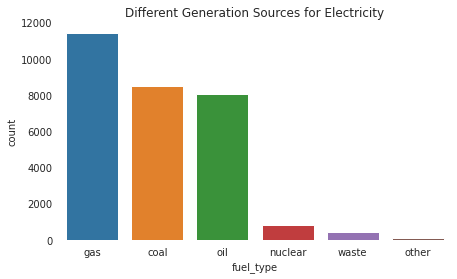

In [100]:
plt.figure(figsize=(7, 4))
gen_source_counts = utilities['fuel_type_code_pudl'].value_counts()
sns.barplot(x=gen_source_counts.index, y=gen_source_counts.values)
plt.xlabel('fuel_type')
plt.ylabel('count')
sns.despine(bottom=True, left=True)
plt.title('Different Generation Sources for Electricity')
plt.show()

In the last three cells, we can see that there are only `6` generation sources in the `utilities` dataframe, and from the barplot, <span style='color:green'> **gas**, **coal** and **oil**</span> occur more frequently as a fuel source for generating electricity than the rest. This is an indication that they are the predominant generation sources.It is important to appreciate the fact that these three are also non-renewable energy sources. But we will come to that later.

We need to find the fuel cost from the values we have. We can derive that with this formula:

``` python
fuel_cost = fuel_qty_burned * fuel_cost_per_unit_burned

```

This will be done for every row in the dataframe and the result will be stored in a new column added to the dataframe named `fuel_cost`.

In [28]:
utilities['fuel_cost'] = utilities['fuel_qty_burned'] * utilities['fuel_cost_per_unit_burned']


**We want to know how fuel costs impact the viability of the sources generating them.**

Using the `DataFrame.groupby()` method, we can group the generating sources and consider the fuel cost corresponding to them.

In [30]:
fuel_type_grouped = utilities.groupby('fuel_type_code_pudl')

We are going to aggregate our result by the `fuel_cost` column and find the mean of fuel costs for different generation sources.

In [33]:
fuel_type_grouped['fuel_cost'].mean()

fuel_type_code_pudl
coal       1.369070e+08
gas        5.396299e+07
nuclear    1.047486e+08
oil        5.017233e+06
other      1.928224e+06
waste      2.503598e+06
Name: fuel_cost, dtype: float64

**Let's visualize the result in a barplot**

We are going to store the mean of the fuel costs in a variable named <span style='color:green'>mean_fuel_cost</span>, then we can plot the values by using the `df.index` and `df.values` attributes for our <span style='color:green'>x</span> and <span style='color:green'>y</span> parameters respectively.

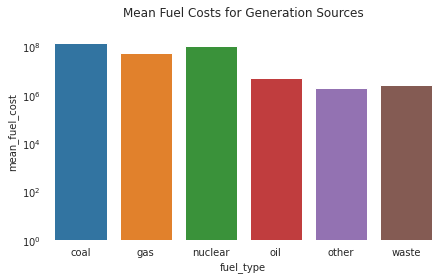

In [106]:
sns.set_style('white')
mean_fuel_cost = fuel_type_grouped['fuel_cost'].mean()
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x=mean_fuel_cost.index, y=mean_fuel_cost.values)
sns.despine(bottom=True, left=True)
plt.xlabel('fuel_type')
plt.ylabel('mean_fuel_cost')
ax.set_yscale('log')
ax.set_ylim(1, 1e+9)
plt.title('Mean Fuel Cost for Generation Sources')
plt.show()

From the barplot, we can observe that both <span style='color:green'>**coal**</span> and <span style='color:green'>**nuclear**</span> have the highest mean fuel cost for generating electricity. In addition, <span style='color:green'>**nuclear**</span> which is assumed to be a **renewable** generation source shows a higher fuel cost than <span style='color:green'>**other**</span> and <span style='color:green'>**waste**</span>.

## Competitiveness of Renewable Electricity

Let's look at the barplot for different generation sources again.

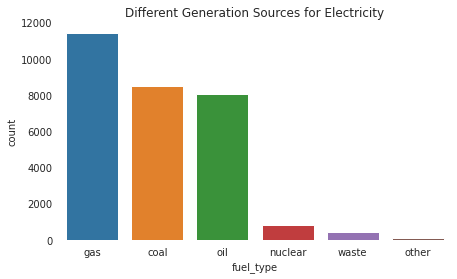

In [107]:
plt.figure(figsize=(7, 4))
gen_source_counts = utilities['fuel_type_code_pudl'].value_counts()
sns.barplot(x=gen_source_counts.index, y=gen_source_counts.values)
plt.xlabel('fuel_type')
plt.ylabel('count')
sns.despine(bottom=True, left=True)
plt.title('Different Generation Sources for Electricity')
plt.show()

<span style='color:green'>**Nuclear, waste**</span> and <span style='color:green'>**other**</span> are the least utilized generation sources. This may be due to the fact that **renewable** sources, erstwhile, is not as widely used as **non-renewables.** 

Let's filter the `utilities` dataframe with only these three **renewable** sources, boolean-index it, and save it in a new dataframe named `renewables`.

In [56]:
renewables = utilities[(utilities['fuel_type_code_pudl']=='nuclear') | (utilities['fuel_type_code_pudl']=='waste') | (utilities['fuel_type_code_pudl']=='other')]


In [112]:
renewables['report_year'].value_counts().sort_index()


1994    100
1995    108
1996     70
1997     64
1998     90
1999     80
2000     78
2001     63
2002     53
2003     46
2004     46
2005     47
2006     47
2007     42
2008     41
2009     45
2010     43
2011     41
2012     40
2013     43
2014     38
2015     39
2016     36
2017     35
2018     36
Name: report_year, dtype: int64

The above cell shows the total entries for **fuel type** that os categorized as **renewables** to be `1,371`. This can be derived by running the code in the snippet below:

```python
renewables['report_year'].value_counts().sum()
```

**To better understand this and look at the trend in the values, let's visualize the data using a lineplot.**

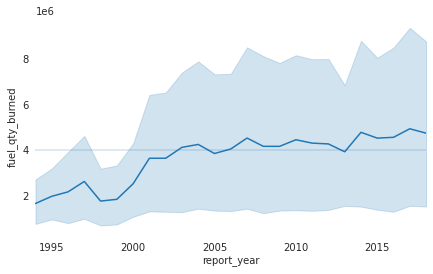

In [113]:
fig = plt.figure(figsize=(7, 4))
sns.set_style('white')
ax = fig.add_subplot(1,1,1)
sns.lineplot(x='report_year', y='fuel_qty_burned', data=renewables)
sns.despine(bottom=True, left=True)
ax.axhline(4e+6, alpha=0.2)
ax.set_xlim(1994, 2018)
plt.show()

The lineplot above highlights the competitiveness of **renewable** electricity over the years.

The lineplot shows an ascendance, which indicates that over the years, more fuel from renewables is being burned(consumed). There has been a marked increase in the quantity of fuel burned in the mid-nineties compared to the more recent years.

The line plot seems to plummet around the year 2017; this is not an indication that renewables are becoming less competitive, rather it is due to the relatively lower number of observations taken for these years.

## Conclusion

In other charts, we already established that with the exception of <span style='color:green'>nuclear</span>, both <span style='color:green'>waste</span> and <span style='color:green'>other</span> generation sources have the cheapest fuel costs.

**It is clear from that renewables are becoming more competitive. One reason for this may be because the world is gradually moving towards a cheaper and cleaner energy solution.**